<a href="https://colab.research.google.com/github/MiyoBran/Alura-ONE-G9/blob/main/formacion-Aprendiendo-a-hacer-ETL-G9-ONE/04-pandas-seleccionar-agrupar-datos/ETL_04_Selecci%C3%B3n_y_agrupamiento_de_datos_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

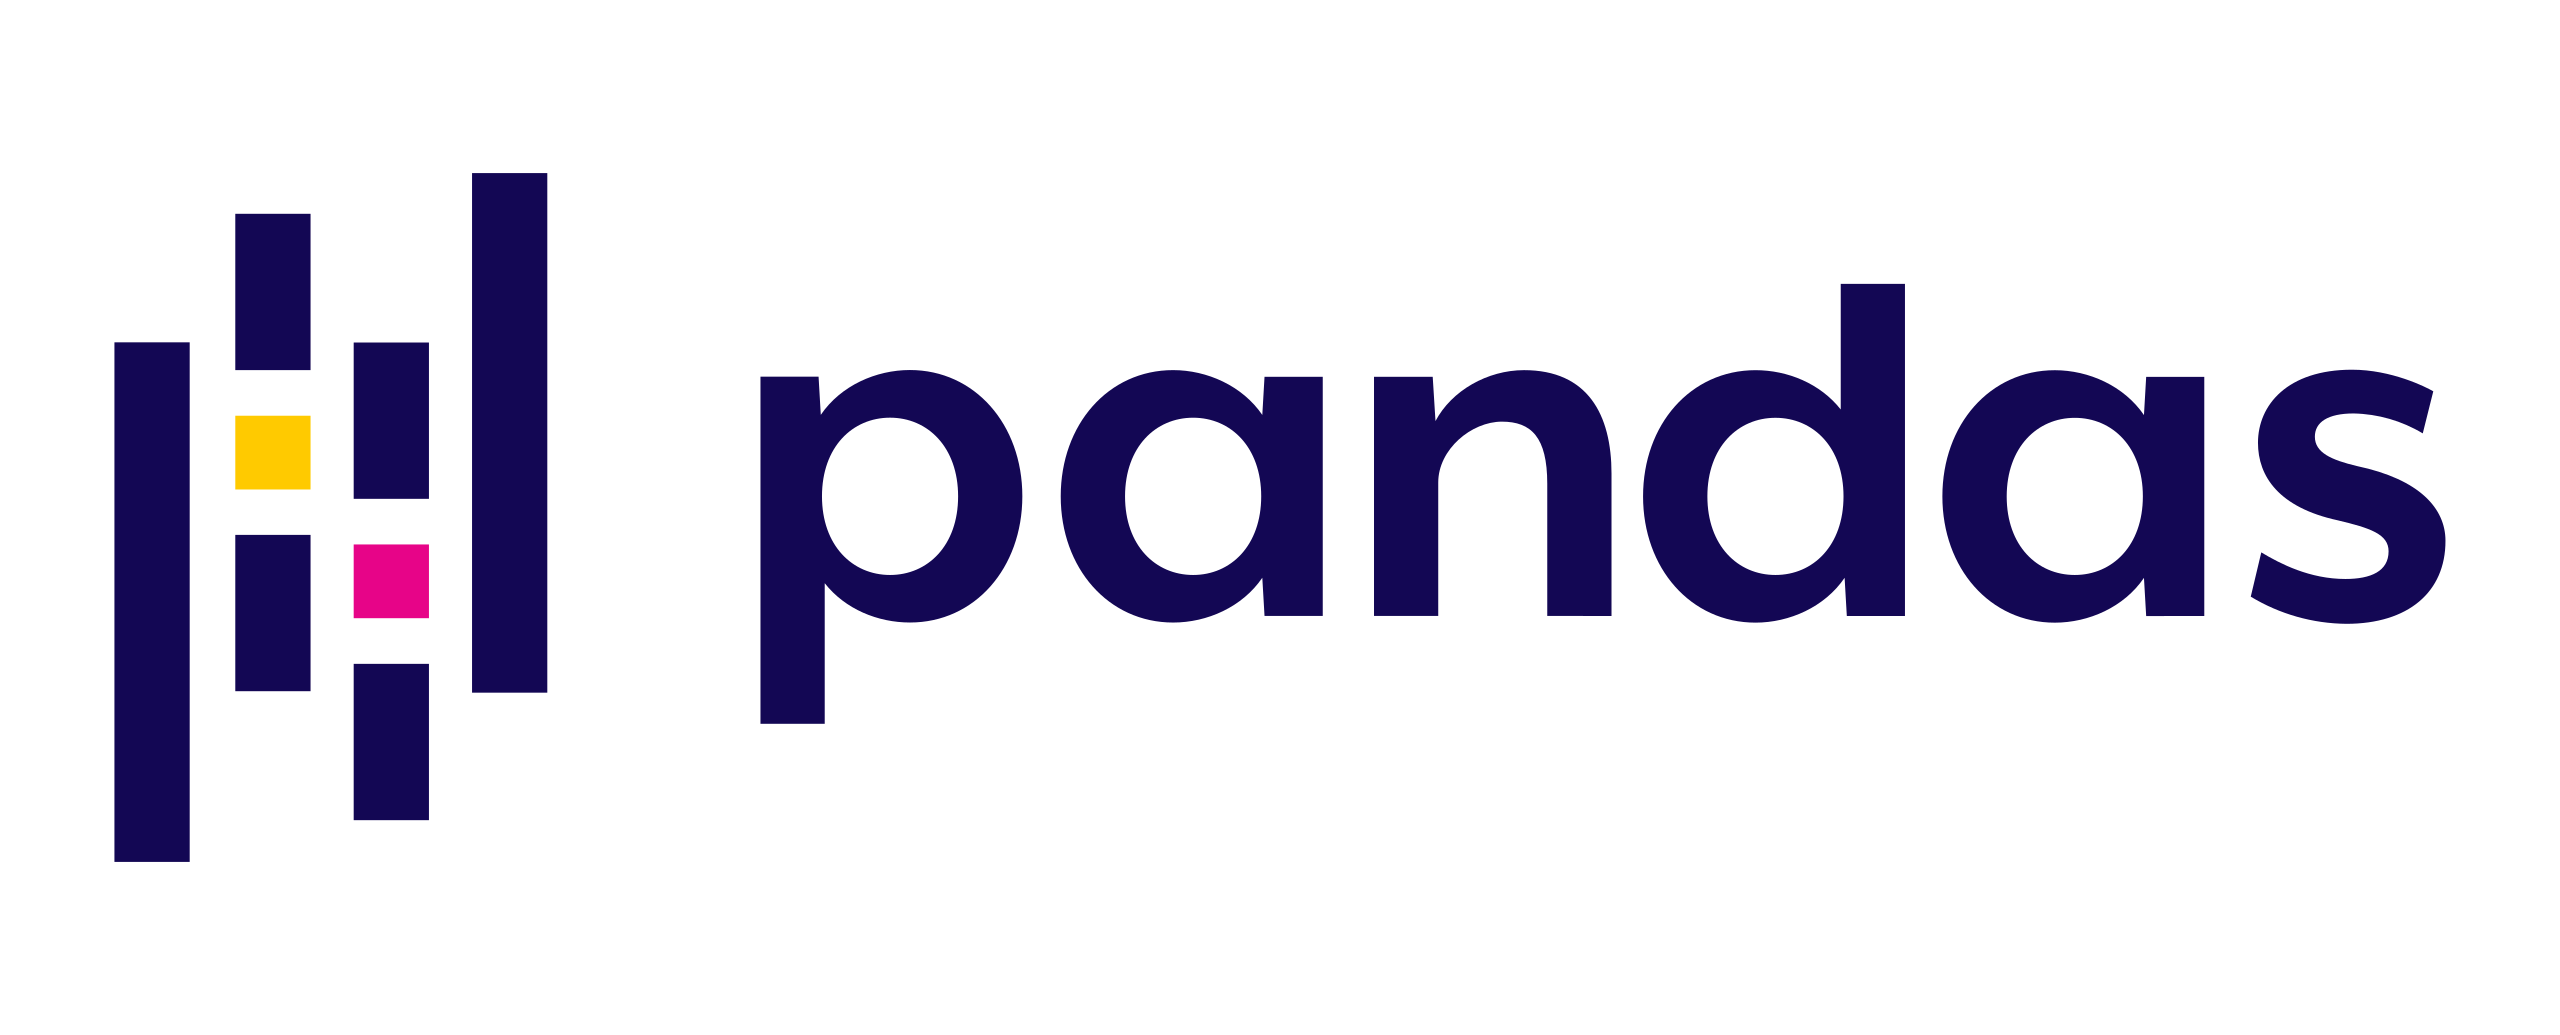

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Conociendo los datos

Analizaremos datos de emisiones de gases de efecto invernadero en Brasil y crearemos tablas y visualizaciones para comprender los datos y generar insights a partir de ellos. Los datos fueron extraídos del SEEG.

---
ℹ Fuente: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatorio de Clima, accesado en http://seeg.eco.br:

- [Download de la base de datos](http://seeg.eco.br/download)

- [Descarga-backup del curso](https://cdn3.gnarususercontent.com.br/2927-pandas-selecao-agrupamento-dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx)
---

Primero, vamos a importar la biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) y los datos que serán utilizados. Como los datos están en un archivo excel, vamos a usar la función [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

### Leyendo la base de datos

In [3]:

import pandas as pd

In [4]:
# Es un archivo Muy grande por lo que necesita bastante tiuempo para descargarse
emision_gases = pd.read_excel('/content/drive/MyDrive/Pandas/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
display(emision_gases)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,8.976000e+02,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,1.300000e+02,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1.380576e+03,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,4.314300e+02,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,4.030000e+04,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103307,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,...,2731963.400,1091033.900,853275.300,1003731.400,1615000.600,1552258.800,216231.900,2805297.300,9.659261e+06,0.000
103308,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,...,2921341.000,1144504.000,896685.000,1074717.000,1763431.000,1706030.000,252599.000,3105007.000,1.053571e+07,0.000
103309,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,...,2950049.000,1151848.000,902209.000,1084073.000,1782863.000,1726958.000,257507.000,3147567.000,1.067568e+07,0.000
103310,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,...,2957780.000,1152868.000,902368.000,1084826.000,1784237.000,1729598.000,258068.000,3155415.000,1.072232e+07,0.000


Vamos a revisar la estructura de nuestro DataFrame con el uso del método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que devuelve la cantidad de líneas y columnas, así como la información de cantidad de datos nulos y tipos de datos para cada una de las colunmas.

In [6]:
emision_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando la base de datos

Sólo nos interesan las emisiones de gases generados por los estados que están en el inventario nacional, por lo que identificaremos los tipos de datos únicos en la columna *Emissão / Remoção / Bunker*.

---
ℹ
- *Remoções son datos referentes a la eliminación de gases de efecto invernadero, que es lo contrario a las emisiones*
- *NCI son los datos no incluídos en el inventario nacional*
- *Bunkers son emisiones del transporte marítimo y aéreo internacional, por lo tanto no son emisiones directas de los estados.*

*Información disponible en el sitio web de SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [7]:
emision_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Primero, vamos a revisar los datos de remoção(eliminación), para identificar si todos ellos son de retirada de gases de efecto invernadero.

In [8]:
# lo siguiente sera una busqueda de los datos que cumplen nuestro criterio de seleccion, convirtiendolos en un valor booleano
(emision_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emision_gases['Emissão / Remoção / Bunker'] == 'Remoção')

,Emissão / Remoção / Bunker
0,False
1,False
2,False
3,False
4,False
...,...
103307,False
103308,False
103309,False
103310,False


In [9]:
# Con el metodo isin() , obtenemos todos los registros que cumplen la condicion
emision_gases[emision_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [10]:
#Aqui agregamos la visualizacion de solo las columnas numericas (ponemos lo que queremos ver de emision_gases , dentro de corchetes , de esta forma filtramos)
emision_gases.loc[emision_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar si todos los valores son negativos, vamos a utilizar la función `max()` para verificar si existe algun valor mayor que 0.

In [11]:
# Filtra las filas donde 'Emissão / Remoção / Bunker' es 'Remoção NCI' o 'Remoção'
# Luego, selecciona las columnas correspondientes a los años de 1970 a 2021
# Finalmente, aplica el método .max() para encontrar el valor máximo en cada una de esas columnas.
# Esto es útil para verificar que todos los valores en estas columnas sean negativos o cero, como se espera para las remociones de gases.
emision_gases.loc[emision_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

,0
1970,0.0
1971,0.0
1972,0.0
1973,0.0
1974,0.0
1975,0.0
1976,0.0
1977,0.0
1978,0.0
1979,0.0


De lo anterior notamos que las emisiones son todas negativas, por lo que no es el dato buscado y podremos eventualmente eliminarlo.


Vamos tambien a identificar si algun valor de tipo *Bunker* corresponde a alguna emisión hecha por algún estado.

In [12]:
# loc nos permite hacer filtros en la fila antes de la coma, y en las columnas despues de la coma
emision_gases.loc[emision_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

El resultado anterior nos indica que las emisiones de tipo bunquer , no fueron generadas en ningun estado (devolvio un array de tipo nan) . Por lo que se realizaron en aguas internacionales y no nos sirve esta informacion, podra ser descartada

In [13]:
# ya sabemos que los datos de bunker , y de remocion no nos sirven , revisaremos los datos del tipo Emision, en la columna que estamos evaluando.
# al hacer esto convertiremos solo esos datos en nuestro dataframe. nos quedaremos con todos los registros que correspondan al filtro entre llaves.
emision_gases = emision_gases[emision_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emision_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


Como no sobró ningún valor útil para analizar en la columna *Emissão / Remoção / Bunker*, vamos a retirarla por completo de la base de datos.

In [14]:
# Al haberlo filtrado , la columna ya no existe/no es necesaria, la eliminamos
emision_gases = emision_gases.drop(columns = 'Emissão / Remoção / Bunker')
emision_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### 🔍 Fase 1: Auditoría de Datos y Selección Condicional

**Contexto del Negocio:**
Al ingerir bases de datos gubernamentales o corporativas, es común encontrar registros que no pertenecen al alcance de nuestro análisis. En este proyecto, nos enfocamos exclusivamente en las emisiones netas generadas dentro del territorio.

**Pasos de Auditoría (Validación de Reglas de Negocio):**
1. **Validación Matemática (`Remoção`):** Los gases retirados de la atmósfera deben tener valores numéricos negativos o cero. Verificamos que no existan valores positivos anómalos usando `.loc[]` y `.max()`.
2. **Validación Geográfica (`Bunker`):** Las emisiones internacionales (marítimas/aéreas) no deben pertenecer a ningún estado o provincia local. Verificamos que la columna `Estado` sea nula para estos casos usando `.unique()`.

**Filtrado Definitivo:**
Una vez validadas las reglas, aplicamos una máscara booleana para conservar únicamente los registros clasificados como `Emissão`, descartando el resto para optimizar la memoria y el análisis posterior.

### 🚀 Refactorización Senior: Pipeline de Auditoría y Filtrado

**El Problema del Código Secuencial (Borrador):**
El enfoque tradicional (paso a paso) sobrescribe la misma variable múltiples veces. Además, operar con columnas que tienen caracteres especiales (`ã`, `/`, espacios) es propenso a errores tipográficos fatales en producción.

**Las Prácticas *Clean Code* Aplicadas:**
1. **Renombramiento Defensivo (`rename`):** Lo primero que hace un Ingeniero de Datos es cambiar los nombres complejos por variables "seguras" (sin espacios, sin tildes, en formato *snake_case*).
2. **Encadenamiento de Métodos (`Method Chaining`):** En lugar de hacer el filtro y la eliminación de la columna en bloques separados, lo unimos en un flujo continuo y lógico.
3. **Higiene de Índices (`reset_index`):** Al eliminar miles de filas de un DataFrame, los índices numéricos quedan con "agujeros" (ej. fila 1, fila 5, fila 9). Es una buena práctica resetear el índice al finalizar el filtro.

In [15]:
import pandas as pd

# ==============================================================================
# 1. INGESTA DE DATOS (Creamos nuestro DataFrame independiente)
# ==============================================================================
print("⏳ Cargando datos desde Excel...")
ruta = '/content/drive/MyDrive/Pandas/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx'
df_emisiones = pd.read_excel(ruta, sheet_name='GEE Estados')

⏳ Cargando datos desde Excel...


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [16]:

# ==============================================================================
# 2. SANEAMIENTO DE METADATOS (Renombramiento Defensivo)
# ==============================================================================
# Estandarizamos todas las cabeceras a texto y eliminamos espacios ocultos
df_emisiones.columns = df_emisiones.columns.astype(str).str.strip()

# Renombramos las columnas críticas a nombres programáticos seguros (snake_case)
df_emisiones = df_emisiones.rename(columns={
    'Emissão / Remoção / Bunker': 'tipo_emision',
    'Estado': 'estado_local'
})

# ==============================================================================
# 3. AUDITORÍA DE NEGOCIO (Validaciones)
# ==============================================================================
print("\n--- AUDITORÍAS DE REGLAS DE NEGOCIO ---")

# 3.1 Matemática: Buscamos cualquier tipo de remoción y verificamos su valor máximo
filtro_remocion = df_emisiones['tipo_emision'].str.contains('Remoção', na=False)
max_remocion = df_emisiones.loc[filtro_remocion, '1970':'2021'].max().max()
print(f"✔️ Max. valor en Remociones: {max_remocion} (Validado: <= 0)")

# 3.2 Geográfica: Verificamos los estados de las emisiones internacionales
estados_bunker = df_emisiones.loc[df_emisiones['tipo_emision'] == 'Bunker', 'estado_local'].unique()
print(f"✔️ Estados asignados a Bunker: {estados_bunker} (Validado: [nan])")

# ==============================================================================
# 4. PIPELINE DE FILTRADO Y LIMPIEZA (Method Chaining)
# ==============================================================================
df_emisiones = (
    df_emisiones
    [df_emisiones['tipo_emision'] == 'Emissão'] # 1. Filtramos solo Emisiones
    .drop(columns=['tipo_emision'])             # 2. Eliminamos la columna (ya es redundante)
    .reset_index(drop=True)                     # 3. Reseteamos el índice de filas
)

print(f"\n✅ Pipeline finalizado. DataFrame limpio listo para análisis: {df_emisiones.shape}")


--- AUDITORÍAS DE REGLAS DE NEGOCIO ---
✔️ Max. valor en Remociones: 0.0 (Validado: <= 0)
✔️ Estados asignados a Bunker: [nan] (Validado: [nan])

✅ Pipeline finalizado. DataFrame limpio listo para análisis: (94748, 62)


### 🗑️ Gestión de Memoria y Arquitectura: `drop` vs `pop`

**El Problema del Exceso de Dimensiones:**
Mantener columnas que no aportan valor analítico consume memoria RAM innecesaria y ralentiza los cálculos vectorizados. Pandas ofrece dos paradigmas para la eliminación de dimensiones:

**1. Paradigma Funcional (Inmutable): `.drop()`**
* **Comportamiento:** Devuelve una *copia* del DataFrame sin los elementos indicados.
* **Ventaja:** Ideal para *Method Chaining* (Pipelines). Permite borrar múltiples filas o columnas simultáneamente usando listas (ej. `.drop(columns=['A', 'B'])`).
* **Clean Code:** Es el estándar moderno en análisis de datos.

**2. Paradigma Mutacional (Extracción): `.pop()`**
* **Comportamiento:** Modifica el DataFrame original "en el lugar" (In-place) eliminando una única columna y **retornándola** como una Serie independiente.
* **Caso de Uso Comercial:** Preparación de datos para Machine Learning (Extraer la variable objetivo `y` separándola de las variables predictoras `X`).

In [17]:
import pandas as pd

# ==============================================================================
# DEMOSTRACIÓN AISLADA: Extracción de Variable Objetivo con .pop()
# (Usamos un DataFrame de prueba para no alterar nuestro df_emisiones principal)
# ==============================================================================

# Simulamos una tabla de clientes lista para un modelo predictivo
df_ml = pd.DataFrame({
    'edad': [34, 45, 28],
    'ingresos_usd': [50000, 80000, 45000],
    'comprara_producto': [True, False, True] # Esta es la variable a predecir
})

print("📦 DataFrame Original (Features + Target):")
display(df_ml)

# Aplicamos .pop() para extraer la variable objetivo (Target)
# Nota: No usamos "df_ml = ...", la mutación es directa.
variable_objetivo_y = df_ml.pop('comprara_producto')

print("\n🎯 Variable Objetivo Extraída (y):")
display(variable_objetivo_y)

print("\n📊 DataFrame Resultante (Solo Features - X):")
display(df_ml)

📦 DataFrame Original (Features + Target):


,edad,ingresos_usd,comprara_producto
0,34,50000,True
1,45,80000,False
2,28,45000,True



🎯 Variable Objetivo Extraída (y):


,comprara_producto
0,True
1,False
2,True



📊 DataFrame Resultante (Solo Features - X):


,edad,ingresos_usd
0,34,50000
1,45,80000
2,28,45000


###Desafío: hora de practicar

¡Ha llegado el momento de practicar! Aplicaremos los conceptos aprendidos durante la clase a través de algunas actividades. Resuelva los problemas propuestos mediante códigos utilizando la base de datos proporcionada en el curso.

Encuentre los valores únicos de las columnas "Nível 1 - Setor" y "Estado" para identificar las actividades económicas presentes en la base de datos y si todos los estados brasileños están presentes en el DataFrame.

* Filtrar el DataFrame sólo con datos de estados de la región sur de Brasil.

* Filtrar el DataFrame sólo con datos de "Mudança de Uso da Terra e Floresta" que sean del Estado de Amazonas.

* Encuentre el valor máximo de emisión para el año 2021 para los datos de "Agropecuária" en el Estado de Pará.

In [18]:
emision_gases['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [19]:
emision_gases['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

In [20]:
# 2 - Para filtrar los Estados de la región Sur de Brasil, debemos seleccionar
# los valores en la columna "Estado" que sean iguales a 'PR' o 'RS' o 'SC'.
# Podemos usar el filtrado booleano junto con el operador OR, usando la barra
# vertical ( | ). O utilice el método isin() con los nombres de los Estados en
# una lista:
emision_gases[emision_gases['Estado'].isin(['PR', 'RS', 'SC'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
36,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GWP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
37,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GTP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
110,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),PR,CIM,NaN,...,2.012596e+06,2.212002e+06,2.241143e+06,2.176752e+06,2.279061e+06,2.115372e+06,2.173266e+06,2.230656e+06,2.488650e+06,2.845457e+06
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),SC,CIM,NaN,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,5.272686e+05,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,RS,AGROPEC,NaN,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,7.698680e+05,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,RS,AGROPEC,NaN,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,8.308050e+05,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,RS,AGROPEC,NaN,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,8.475340e+05,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,RS,AGROPEC,NaN,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,8.553060e+05,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


In [21]:
# 3 - Podemos realizar un filtrado booleano utilizando el operador lógico AND,
# a través del símbolo &:
emision_gases[(emision_gases['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta') & (emision_gases['Estado'] == 'AM')]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2 (t),AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR2,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR4,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR5,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR6,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,AM,AGROPEC,NaN,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,AM,AGROPEC,NaN,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,AM,AGROPEC,NaN,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,AM,AGROPEC,NaN,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


In [22]:
# 4 - Podemos usar el método loc() para realizar un filtrado booleano y
# seleccionar la columna para el año 2021 simultáneamente y usar el método
# max() para extraer el valor máximo de emisión de la columna seleccionada:
emision_gases.loc[(emision_gases['Nível 1 - Setor'] == 'Agropecuária') & (emision_gases['Estado'] == 'PA'), 2021].max()

36856969.7986

#2. Agrupamiento de los datos

### Modificando el formato del Dataframe

Para realizar las agrupaciones en los datos de emisiones, la base de datos debe estar en un formato adecuado, con los valores de emisiones todos en la misma columna. Para ello debemos modificar el formato de la base de datos para que las columnas referentes a cada año se conviertan en una única columna.

In [23]:
emision_gases.loc[:,'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [24]:
#Creamos una lista con las columnas que no quiero alterar
columnas_info = list(emision_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
columnas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [25]:
emision_gases.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [26]:
#Aqui tenemos la lista con las columnas que SI queremos alterar
columnas_emision = list(emision_gases.loc[:,1970:2021].columns)
columnas_emision

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar la transformación del DataFrame, utilizamos el método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Este método tiene como objetivo transformar un DataFrame de un formato ancho (*wide*) para un formato largo (*long*).

In [27]:
emision_gases.melt(id_vars = columnas_info, value_vars = columnas_emision, var_name = 'Año' , value_name = 'Emision')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [28]:
# guardamos nuestro data frame de columnas transpuestas
emisiones_por_año = emision_gases.melt(id_vars = columnas_info, value_vars = columnas_emision, var_name = 'Año' , value_name = 'Emision')

### Análisis de las emisiones

Vamos a realizar un análisis, pero esta vez, de la cantidad de la emisión **total** por tipo de gas. Para esto, vamos a realizar un agrupamiento de los datos con la función [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [29]:
emisiones_por_año.groupby('Gás')

Podemos revisar cuáles datos fueron agrupados en cada grupo con el uso del atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) y realizar selecciones de grupos específicos con el método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [30]:
emisiones_por_año.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [31]:
emisiones_por_año.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


Los métodos de agregación posibles con la utilización de `groupby()`son los siguientes:
- `count()` para realizar el conteo
- `sum()` para la suma
- `mean()` para el promedio
- `median()` para la mediana
- `min()` para el valor mínimo
- `max()` para el valor máximo
- `std()` para la desviación estándar
- `var()` para la varianza

### OPTIMIZACION DEL SUM()

💡 INSIGHT DE NEGOCIO:
Las emisiones de la familia CO2 corresponden al 99.74% de las emisiones totales en el territorio analizado (1970 - 2021).


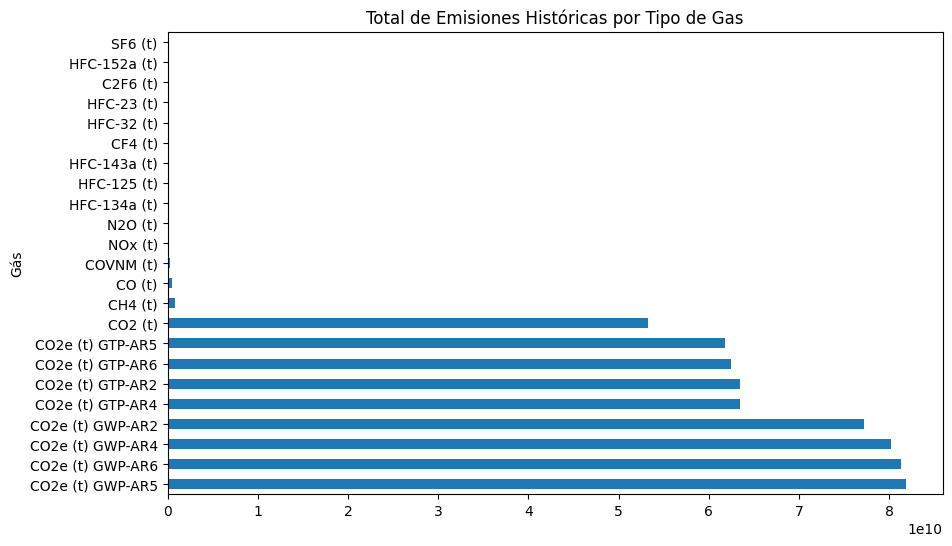

In [32]:
# ==============================================================================
# REFACTORIZACIÓN SENIOR: Agrupación, Visualización e Insights
# ==============================================================================

# 1. Agrupación Optimizada (Proyección de columna con doble corchete)
emisiones_por_gas = (
    emisiones_por_año.groupby('Gás')[['Emision']]
    .sum()
    .sort_values(by='Emision', ascending=False)
)

# 2. Visualización de Datos (Business Intelligence)
# Añadimos un título para dar contexto al gráfico en presentaciones
emisiones_por_gas.plot(
    kind='barh',
    figsize=(10,6),
    title='Total de Emisiones Históricas por Tipo de Gas',
    legend=False
);

# 3. Filtrado Semántico (Reemplazo de iloc[0:9])
# Como agrupamos por 'Gás', ahora los nombres de los gases son el Índice de la tabla.
filtro_co2 = emisiones_por_gas.index.str.contains('CO2', na=False)
emisiones_solo_co2 = emisiones_por_gas[filtro_co2]

# 4. Cálculo del KPI (Porcentaje de participación)
total_co2 = emisiones_solo_co2['Emision'].sum()
total_general = emisiones_por_gas['Emision'].sum()
porcentaje = (total_co2 / total_general) * 100

# 5. Output Formateado
print(f"💡 INSIGHT DE NEGOCIO:")
print(f"Las emisiones de la familia CO2 corresponden al {porcentaje:.2f}% "
      f"de las emisiones totales en el territorio analizado (1970 - 2021).")

In [33]:
%%time
# Actualmente este codigo tarda muchisimo, el sum() ahora no descarta columnas
# solo por no ser numericas. por otro lado en esta linea se guardo en una nueva
# variable y se hizo el sort. en nuestra optimizacion previa se uso el mismo
# nombre de variable emisiones_por_gas =
# emisiones_por_año.groupby('Gás').sum(numeric_only=True).sort_values('Emision',
# ascending = False) emisiones_por_gas

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [34]:
#emisiones_por_gas.plot(kind = 'barh', figsize = (10,6));

In [35]:
emisiones_por_gas.iloc[0:9]

,Emision
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [41]:
porcentaje = float(emisiones_por_gas.iloc[0:9].sum()/emisiones_por_gas.sum())*100

/tmp/ipython-input-2827036159.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  porcentaje = float(emisiones_por_gas.iloc[0:9].sum()/emisiones_por_gas.sum())*100


In [43]:
print(f'Las emisiones de CO2 corresponden a {porcentaje:.2f} % de las emisiones totales de gases de efecto invernadero en Brasil de 1970 a 2021.')

Las emisiones de CO2 corresponden a 99.74 % de las emisiones totales de gases de efecto invernadero en Brasil de 1970 a 2021.


### 🛠️ Refactorización Arquitectónica: Rendimiento y Robustez

Durante la fase de análisis exploratorio (EDA), es común generar código que funcionalmente entrega el resultado correcto, pero que estructuralmente presenta cuellos de botella y fragilidad ante actualizaciones de datos.

**1. Optimización de Memoria y Tiempo de Ejecución (Proyección)**
* **Problema:** Aplicar funciones de agregación globales (ej. `df.groupby('A').sum()`) sobre DataFrames masivos (~5M de filas) obliga al motor a iterar intentando sumar columnas no numéricas, disparando los tiempos de ejecución.
* **Solución (Clean Code):** Proyección explícita de la variable objetivo. Utilizando `df.groupby('A')[['B']].sum()`, el motor aísla la columna matemática antes de procesar, reduciendo el tiempo de cálculo a milisegundos.

**2. Prevención de Deuda Técnica (Eliminación de "Magic Numbers")**
* **Problema:** Utilizar índices posicionales estáticos (`.iloc[0:9]`) para aislar categorías asume que los datos nunca cambiarán su orden de clasificación. Si la base de datos se actualiza, el cálculo sumará categorías incorrectas silenciosamente.
* **Solución (Clean Code):** Implementación de filtrado semántico dinámico (`.str.contains('Termo_Clave')`). Esto garantiza que la lógica de negocio se mantenga intacta independientemente del volumen o el ordenamiento de los datos futuros, logrando un código *Update-Proof* (a prueba de actualizaciones).

### 🔄 Fase 2: Transformación Dimensional (Wide to Long) y Agregación

**Contexto del Negocio:**
Para realizar análisis temporales y agrupaciones efectivas, las bases de datos deben estar normalizadas. Convertimos la estructura matricial de años (formato Wide) en una estructura tabular estandarizada (formato Long) utilizando el método `.melt()`.

**Pasos de Análisis:**
1. **Derretimiento de Columnas (`melt`):** Definimos qué columnas actúan como identificadores fijos (`id_vars`) y cuáles contienen los valores que se transformarán en filas (`value_vars`).
2. **Agregación Matemática (`groupby`):** Agrupamos el nuevo conjunto de datos por categoría (Tipo de Gas) y calculamos el volumen total histórico de emisiones.
3. **Generación de Insights (Business Intelligence):** Calculamos el peso relativo (%) del principal agente emisor (CO2) sobre el total general.

In [37]:
# ==============================================================================
# 1. TRANSFORMACIÓN DIMENSIONAL (Melt: Wide to Long)
# ==============================================================================
print("🔄 Transformando estructura de datos (Wide -> Long)...")

# Identificamos las columnas categóricas (Identificadores que no se moverán)
# Usamos slicing por posición (iloc) para seleccionar desde la primera hasta 'Produto'
idx_producto = df_emisiones.columns.get_loc('Produto')
columnas_info = list(df_emisiones.columns[:idx_producto + 1])

# Identificamos las columnas de valor (Años de 1970 a 2021)
columnas_emision = list(df_emisiones.loc[:, '1970':'2021'].columns)

# Aplicamos el derretimiento
df_largo = df_emisiones.melt(
    id_vars=columnas_info,
    value_vars=columnas_emision,
    var_name='Año',
    value_name='Emision'
)

print(f"✔️ Transformación completada. Nueva dimensión: {df_largo.shape}")

# ==============================================================================
# 2. INTELIGENCIA DE NEGOCIOS (Agregación por Categoría)
# ==============================================================================
print("\n📊 Calculando totales históricos por tipo de gas...")

# Agrupamos por gas, sumamos únicamente la columna numérica de emisiones y ordenamos
df_emisiones_por_gas = (
    df_largo.groupby('Gás', as_index=False)['Emision']
    .sum()
    .sort_values(by='Emision', ascending=False)
    .reset_index(drop=True)
)

# Visualización rápida del Top 5
display(df_emisiones_por_gas.head(5))

# ==============================================================================
# 3. GENERACIÓN DE INSIGHTS GERENCIALES (Cálculo Relativo)
# ==============================================================================

# Filtramos semánticamente todos los gases que contengan "CO2" en su nombre
filtro_co2 = df_emisiones_por_gas['Gás'].str.contains('CO2', na=False)

# Calculamos totales
total_co2 = df_emisiones_por_gas.loc[filtro_co2, 'Emision'].sum()
total_general = df_emisiones_por_gas['Emision'].sum()

# Calculamos porcentaje
porcentaje_co2 = (total_co2 / total_general) * 100

print(f"\n💡 INSIGHT DE NEGOCIO:")
print(f"Las emisiones de la familia CO2 representan el {porcentaje_co2:.2f}% "
      f"del volumen total histórico analizado.")

🔄 Transformando estructura de datos (Wide -> Long)...
✔️ Transformación completada. Nueva dimensión: (4926896, 12)

📊 Calculando totales históricos por tipo de gas...


,Gás,Emision
0,CO2e (t) GWP-AR5,8.181375e+10
1,CO2e (t) GWP-AR6,8.132316e+10
2,CO2e (t) GWP-AR4,8.015921e+10
3,CO2e (t) GWP-AR2,7.720596e+10
4,CO2e (t) GTP-AR4,6.344612e+10



💡 INSIGHT DE NEGOCIO:
Las emisiones de la familia CO2 representan el 99.74% del volumen total histórico analizado.


In [38]:
%%time
import pandas as pd

# ==============================================================================
# OPTIMIZACIÓN DE AGREGACIÓN (Proyección de Columnas)
# ==============================================================================

# MAL DISEÑO (Lento): df.groupby('Categoria').sum() -> Evalúa toda la tabla
# BUEN DISEÑO (Rápido): df.groupby('Categoria')['Valor_a_Sumar'].sum()

df_emisiones_por_gas = (
    df_largo.groupby('Gás', as_index=False)['Emision'] # <- El secreto está aquí
    .sum()
    .sort_values(by='Emision', ascending=False)
    .reset_index(drop=True)
)

print("✅ Cálculo finalizado.")
display(df_emisiones_por_gas.head(5))

✅ Cálculo finalizado.


,Gás,Emision
0,CO2e (t) GWP-AR5,8.181375e+10
1,CO2e (t) GWP-AR6,8.132316e+10
2,CO2e (t) GWP-AR4,8.015921e+10
3,CO2e (t) GWP-AR2,7.720596e+10
4,CO2e (t) GTP-AR4,6.344612e+10


CPU times: user 361 ms, sys: 73.8 ms, total: 435 ms
Wall time: 437 ms


### 📚 Teoría de Arquitectura de Datos: El Paradigma `groupby`

La agrupación de datos es el motor principal de la Inteligencia de Negocios (BI). Permite transformar millones de transacciones individuales en reportes gerenciales resumidos. En Pandas, el método `groupby` ejecuta este proceso a través de un flujo de trabajo optimizado conocido modernamente como **Split-Project-Apply-Combine** (Dividir, Proyectar, Aplicar y Combinar).

**La Lógica de Negocios (Ejemplo Comercial):**
Imagina una base de datos con todas las ventas nacionales de una PyME.
1. **Dividir (Split):** El motor separa el conjunto de datos masivo en "sub-tablas" lógicas. Si agrupamos por sucursal (`.groupby('Sucursal')`), Pandas crea una tabla virtual aislada para cada local comercial. *Métodos útiles para inspección: `.groups` y `.get_group()`.*
2. **Proyectar (Project) - *¡El paso de Optimización!*:** Antes de calcular, seleccionamos exclusivamente la columna matemática que nos interesa (ej. `[['Ingresos']]`). Si omitimos este paso, el sistema desperdiciará memoria intentando calcular columnas de texto (nombres de clientes, direcciones), colapsando el rendimiento.
3. **Aplicar (Apply):** Se ejecuta una función matemática o estadística sobre la columna proyectada en cada sub-tabla de forma independiente.
4. **Combinar (Combine):** El motor ensambla los resultados de cada sucursal y devuelve un único reporte tabular consolidado.

**Funciones de Agregación (Fase "Aplicar"):**
Dependiendo del objetivo del análisis, podemos aplicar diferentes métricas estadísticas a nuestros grupos:
* **`.sum()`**: Calcula la sumatoria total (ej. Facturación total).
* **`.mean()`**: Calcula el promedio aritmético (ej. Ticket promedio de venta).
* **`.size()`** / **`.count()`**: Calcula la cantidad de registros (ej. Volumen de transacciones).
* **`.min()`** / **`.max()`**: Encuentra los valores extremos (ej. Venta más baja y más alta).
* **`.std()`** / **`.var()`**: Mide la dispersión estadística (Desviación estándar y Varianza).
* **`.describe()`**: Genera un reporte rápido con múltiples estadísticas descriptivas a la vez.
* **`.first()`** / **`.last()`**: Extrae el primer o último registro cronológico del grupo.

> ⚠️ **Regla de Oro (Clean Code & Performance):** > Para garantizar que el código escale desde miles hasta millones de registros en milisegundos, la sintaxis estandarizada siempre debe ser:
> `dataframe.groupby('Columna_Categoria')[['Columna_Numerica']].funcion_matematica()`

#3. Agrupamientos multi-index

### Emisión de gases por sector

Ahora necesitamos encontrar dos informaciones:

- Descubrir cuales son los sectores más contaminantes por cada gás;
- Descubrir cuales son los gases más contaminantes por cada sector.

### 📊 Agrupación Multidimensional (MultiIndex) y Optimización

**Contexto Analítico:**
Para obtener un nivel de granularidad mayor, necesitamos cruzar dos dimensiones categóricas: El tipo de Gas y el Sector económico que lo emite.

**Arquitectura del Código (Clean Code):**
Al pasar una lista de columnas al método `.groupby(['Cat_1', 'Cat_2'])`, Pandas genera un *MultiIndex* (Índice Jerárquico).
Para evitar el cuello de botella computacional de las versiones modernas de Pandas, aplicamos inmediatamente una **Proyección Explícita** `[['Columna_Numerica']]` antes de invocar la función de agregación `.sum()`. Esto garantiza que la operación matemática se ejecute en milisegundos, independientemente del volumen de datos.

In [39]:
%%time
import pandas as pd

# ==============================================================================
# AGRUPACIÓN JERÁRQUICA (MultiIndex) CON PROYECCIÓN EXPLÍCITA
# ==============================================================================

# 1. Agrupamos por dos niveles: Gas y Sector
# 2. Proyectamos EXCLUSIVAMENTE la columna 'Emision' para optimizar la CPU
gas_por_sector = (
    emisiones_por_año.groupby(['Gás', 'Nível 1 - Setor'])[['Emision']]
    .sum()
)

print("✅ Agrupación multidimensional finalizada.")
display(gas_por_sector.head(10))

✅ Agrupación multidimensional finalizada.


Emision
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
         Processos Industriais               2.092132e+06
         Resíduos                            7.907453e+07
CO (t)   Agropecuária                        7.132479e+07
         Energia                             3.959769e+08
         Processos Industriais               4.385133e+07

CPU times: user 773 ms, sys: 158 ms, total: 930 ms
Wall time: 932 ms


Para descubrir el sector que emite mayor cantidad de CO2, podemos realizar una selección específica de gas CO2 mediante el método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extrayendo de esto el valor máximo y el índice máximo con los métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) y [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

In [40]:
# con el metodo cross-section hacemos la misma agrupacion mucho mas
# eficientemente
gas_por_sector.xs('CO2 (t)', level = 0)

,Emision
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [44]:
# en este ejemplo buscamos por dos indices, o dos niveles de indices
# para agruparnos los datos busca el valor en la primer columna, y luego filtra
# la segunda columna.
gas_por_sector.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level = [0,1])

,,Emision
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [45]:
#aqui con nuestros datos agrupados ,queremos el valor maximo, usamos max()
gas_por_sector.xs('CO2 (t)', level = 0).max()

,0
Emision,3.733930e+10


In [46]:
#si queremos identificar a que registro corresponde, usamos idxmax()
gas_por_sector.xs('CO2 (t)', level = 0).idxmax()

,0
Emision,Mudança de Uso da Terra e Floresta


### 🧭 Navegación Multidimensional: El Método Cross-Section (`.xs`)

**Contexto Analítico:**
Tras realizar una agrupación múltiple, nuestro DataFrame `gas_por_sector` posee un *MultiIndex* (Nivel 0: Gas, Nivel 1: Sector). Los métodos tradicionales de filtrado no son eficientes para estructuras jerárquicas.

**La Herramienta (`.xs`):**
El método *Cross-Section* permite extraer "rebanadas" de datos especificando directamente la llave (nombre) y el nivel del índice donde se encuentra.

**Funciones de Extracción Extrema:**
* `.max()`: Retorna la magnitud (el valor numérico máximo).
* `.idxmax()`: Retorna la identidad (el nombre del índice que contiene dicho valor máximo). Esencial para responder preguntas de negocio del tipo *"¿Quién fue el mayor responsable de...?"*.

In [47]:
# ==============================================================================
# EXPLORACIÓN MANUAL DE MULTIINDEX (Pedagogía previa a la automatización)
# ==============================================================================

gas_objetivo = 'CO2 (t)'

print(f"🔍 1. Explorando el Nivel 0 (Filtro por Gas: {gas_objetivo})")
# Extraemos todos los sectores que emitieron este gas específico
desglose_co2 = gas_por_sector.xs(gas_objetivo, level=0)
display(desglose_co2)

print(f"\n🎯 2. Búsqueda Exacta (Nivel 0 + Nivel 1)")
# Buscamos un cruce específico: CO2 + Sector de Cambios de Uso de Tierra
cruce_especifico = gas_por_sector.xs(
    (gas_objetivo, 'Mudança de Uso da Terra e Floresta'),
    level=[0, 1]
)
display(cruce_especifico)

# ==============================================================================
# EXTRACCIÓN DE IDENTIDAD MÁXIMA (.idxmax vs .max)
# ==============================================================================
print("\n🏆 3. Análisis de Extremos (¿Quién contaminó más con CO2?)")

valor_maximo = desglose_co2.max().values[0]
sector_culpable = desglose_co2.idxmax().values[0]

print(f"El valor máximo emitido fue de: {valor_maximo:,.2f} toneladas.")
print(f"El sector responsable de esa emisión máxima es: '{sector_culpable}'")

🔍 1. Explorando el Nivel 0 (Filtro por Gas: CO2 (t))


,Emision
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07



🎯 2. Búsqueda Exacta (Nivel 0 + Nivel 1)


,,Emision
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10



🏆 3. Análisis de Extremos (¿Quién contaminó más con CO2?)
El valor máximo emitido fue de: 37,339,300,278.00 toneladas.
El sector responsable de esa emisión máxima es: 'Mudança de Uso da Terra e Floresta'


### 🏢 Arquitectura de Datos: Estructuras Jerárquicas (MultiIndex)

**El Valor de Negocio (Dimensionalidad):**
Un DataFrame *MultiIndex* nos permite representar niveles de jerarquía en nuestros datos, simulando el comportamiento de una Tabla Dinámica compleja. Es la estructura ideal para consolidar métricas donde existe una relación de "Padre-Hijo" (Ej: `País -> Provincia`, `Año -> Trimestre`, o `Tipo de Gas -> Sector Económico`).

**Anatomía de la Jerarquía:**
Los niveles se leen de izquierda a derecha.
* El nivel más externo (Ej. Gas) es el `level=0`.
* El nivel interno (Ej. Sector) es el `level=1`.

**Estrategias de Navegación y Extracción (Slicing):**
Dependiendo de la pregunta de negocio que debamos responder, Pandas ofrece diferentes motores de búsqueda:

**1. Búsqueda Raíz (Nivel 0) con `.loc[]`:**
Ideal para consultar rápidamente a la categoría "Padre".
* *Pregunta:* "¿Cuánto se emitió de CH4 en total en todos los sectores?"
* *Código:* `datos.loc['CH4 (t)']`

**2. Coordenada Exacta (Tuplas) con `.loc[]`:**
Se utiliza para encontrar una intersección específica cruzando todos los niveles. Es altamente eficiente porque le pasamos la "dirección" exacta en formato de Tupla `()`.
* *Pregunta:* "¿Cuánto CH4 emitió exactamente el sector Agricultura?"
* *Código:* `datos.loc[('CH4 (t)', 'Agricultura')]`

**3. Sección Transversal (El motor `.xs()`):**
La verdadera potencia analítica. Se utiliza cuando necesitamos consultar la categoría "Hijo" (Nivel 1), **ignorando** por completo quién es el padre (Nivel 0). Usar `.loc` aquí sería complejo, pero `.xs` hace un corte transversal algorítmico.
* *Pregunta:* "Quiero ver las emisiones de Agricultura, sin importar de qué tipo de gas estemos hablando."
* *Código:* `datos.xs('Agricultura', level=1)`

Para evitar un método manual para cada tipo de gas, podemos explorar más a fondo el método. `groupby()` combinado con [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

In [48]:
gas_por_sector.groupby(level = 0).idxmax()

,Emision
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


Finalmente, podemos crear una tabla resumida con información de los valores máximos de emisión para cada tipo de gas y con la referencia del sector con mayor emisión de cada gas.

In [49]:
gas_por_sector.groupby(level = 0).max()

,Emision
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [50]:
valores_max = gas_por_sector.groupby(level = 0).max().values

In [51]:
tabla_totalizada = gas_por_sector.groupby(level = 0).idxmax()
tabla_totalizada.insert(1, 'Cantidad de emisión', valores_max)
display(tabla_totalizada)

,Emision,Cantidad de emisión
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


Podemos cambiar el orden de los niveles del índice para encontrar la otra información, que nos dice cuál es el gas más emitido para cada tipo de sector. Para ello utilizaremos el método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [52]:
gas_por_sector.swaplevel(0, 1)

Emision
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [53]:
gas_por_sector.swaplevel(0, 1).groupby(level = 0).idxmax()

,Emision
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### 🎯 Agregación Nombrada (`.agg`): Respondiendo Preguntas de Negocio

El método `.idxmax()` es vital para encontrar "quién" generó el valor máximo dentro de un grupo. Sin embargo, extraer el nombre (`.idxmax()`) por un lado y el valor (`.max()`) por otro para luego unirlos manualmente es una práctica riesgosa.

**La Arquitectura *Clean Code* (Named Aggregation):**
Utilizamos el método `.agg()` para realizar múltiples cálculos simultáneos sobre la misma columna agrupada. Esto garantiza la integridad referencial de los datos y nos permite asignar nombres claros a las columnas resultantes en un solo paso.

**1. Primera Pregunta Gerencial:**
*Para cada Gas (Nivel 0), ¿cuál es el Sector más contaminante y cuánto emitió?*

**2. Segunda Pregunta Gerencial (Pivoteo con `swaplevel`):**
Invertimos la jerarquía del MultiIndex (Sector pasa a Nivel 0, Gas a Nivel 1) para responder:
*Para cada Sector, ¿cuál es el Gas más contaminante y cuánto emitió?*

In [54]:
# ==============================================================================
# PREGUNTA 1: Sector más contaminante por cada Tipo de Gas
# ==============================================================================
print("🏢 PREGUNTA 1: Mayor Sector emisor por cada Tipo de Gas")

# Agrupamos por el Nivel 0 (Gas) y aplicamos múltiples métricas simultáneas
top_sector_por_gas = gas_por_sector.groupby(level=0)['Emision'].agg(
    Sector_Principal='idxmax',
    Total_Emitido='max'
)

# Limpieza estética: idxmax devuelve una tupla ('Gas', 'Sector'). Extraemos solo el Sector [1].
top_sector_por_gas['Sector_Principal'] = top_sector_por_gas['Sector_Principal'].apply(lambda x: x[1])

display(top_sector_por_gas.head(10))

# ==============================================================================
# PREGUNTA 2: Gas más contaminante por cada Sector Económico
# ==============================================================================
print("\n☁️ PREGUNTA 2: Mayor Gas emisor por cada Sector Económico")

# 1. Invertimos la jerarquía: Sector sube a Nivel 0, Gas baja a Nivel 1
sector_por_gas = gas_por_sector.swaplevel(0, 1)

# 2. Agrupamos por el nuevo Nivel 0 (Sector) y aplicamos las métricas
top_gas_por_sector = sector_por_gas.groupby(level=0)['Emision'].agg(
    Gas_Principal='idxmax',
    Total_Emitido='max'
)

# Limpieza estética: idxmax devuelve ('Sector', 'Gas'). Extraemos solo el Gas [1].
top_gas_por_sector['Gas_Principal'] = top_gas_por_sector['Gas_Principal'].apply(lambda x: x[1])

display(top_gas_por_sector)

🏢 PREGUNTA 1: Mayor Sector emisor por cada Tipo de Gas


,Sector_Principal,Total_Emitido
Gás,,
C2F6 (t),Processos Industriais,5.765018e+02
CF4 (t),Processos Industriais,7.135481e+03
CH4 (t),Agropecuária,5.928481e+08
CO (t),Energia,3.959769e+08
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10
CO2e (t) GTP-AR2,Mudança de Uso da Terra e Floresta,3.850044e+10
CO2e (t) GTP-AR4,Mudança de Uso da Terra e Floresta,3.850044e+10
CO2e (t) GTP-AR5,Mudança de Uso da Terra e Floresta,3.831675e+10
CO2e (t) GTP-AR6,Mudança de Uso da Terra e Floresta,3.843359e+10



☁️ PREGUNTA 2: Mayor Gas emisor por cada Sector Económico


,Gas_Principal,Total_Emitido
Nível 1 - Setor,,
Agropecuária,CO2e (t) GWP-AR5,2.184388e+10
Energia,CO2e (t) GWP-AR6,1.385259e+10
Mudança de Uso da Terra e Floresta,CO2e (t) GWP-AR5,4.051523e+10
Processos Industriais,CO2e (t) GWP-AR6,3.352064e+09
Resíduos,CO2e (t) GWP-AR5,2.310099e+09


### Emisión a lo largo de los años

Identifiquemos si las emisiones de gases de efecto invernadero han aumentado o disminuido a lo largo de los años y visualizaremos esta variación para cada tipo de gas emitido por separado.

In [58]:
emisiones_por_año

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Año,Emision
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


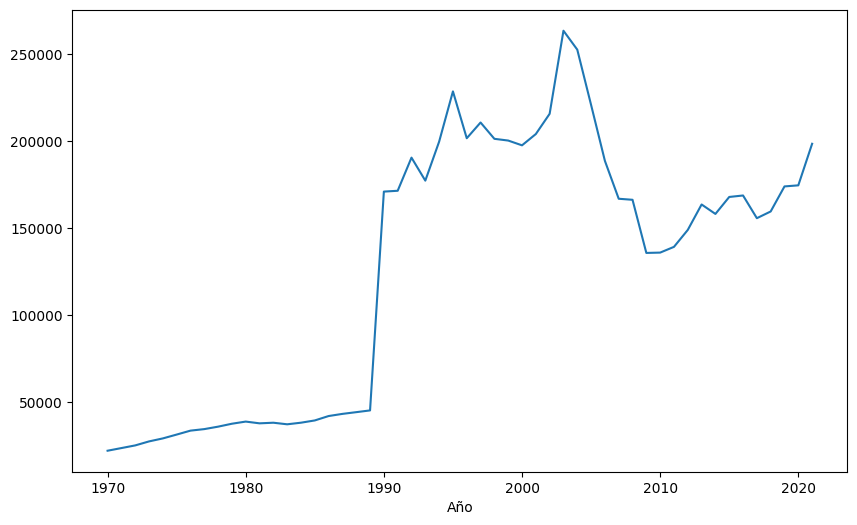

In [60]:
#Estamos graficando el total de emisiones de gases, por año:
emisiones_por_año.groupby('Año')['Emision'].mean().plot(figsize = (10,6));

In [61]:
# aqui obtenemos la key que tiene el maximo value --> o sea año de mayor
# promedio de la serie analizada
emisiones_por_año.groupby('Año').mean(numeric_only=True).idxmax()

,0
Emision,2003


In [62]:
# en este punto estamos agrupando por dos informaciones, es decir ademas del
# año, agrupamos tambien por gas --> consiguiendo el promedio
emisiones_por_año.groupby(['Año', 'Gás']).mean(numeric_only=True)

Emision
Año  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [63]:
# lo guardamos en una variable, es decir creamos el dataframe con la informacion
# filtrada en nuestra tabla multiindex, con el reset index , tendremos una tabla
# de 3 columnas
promedio_emision_anual = emisiones_por_año.groupby(['Año', 'Gás']).mean(numeric_only=True).reset_index()
promedio_emision_anual

,Año,Gás,Emision
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [64]:
promedio_emision_anual = promedio_emision_anual.pivot_table(index = 'Año', columns = 'Gás', values = 'Emision')
promedio_emision_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Año,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


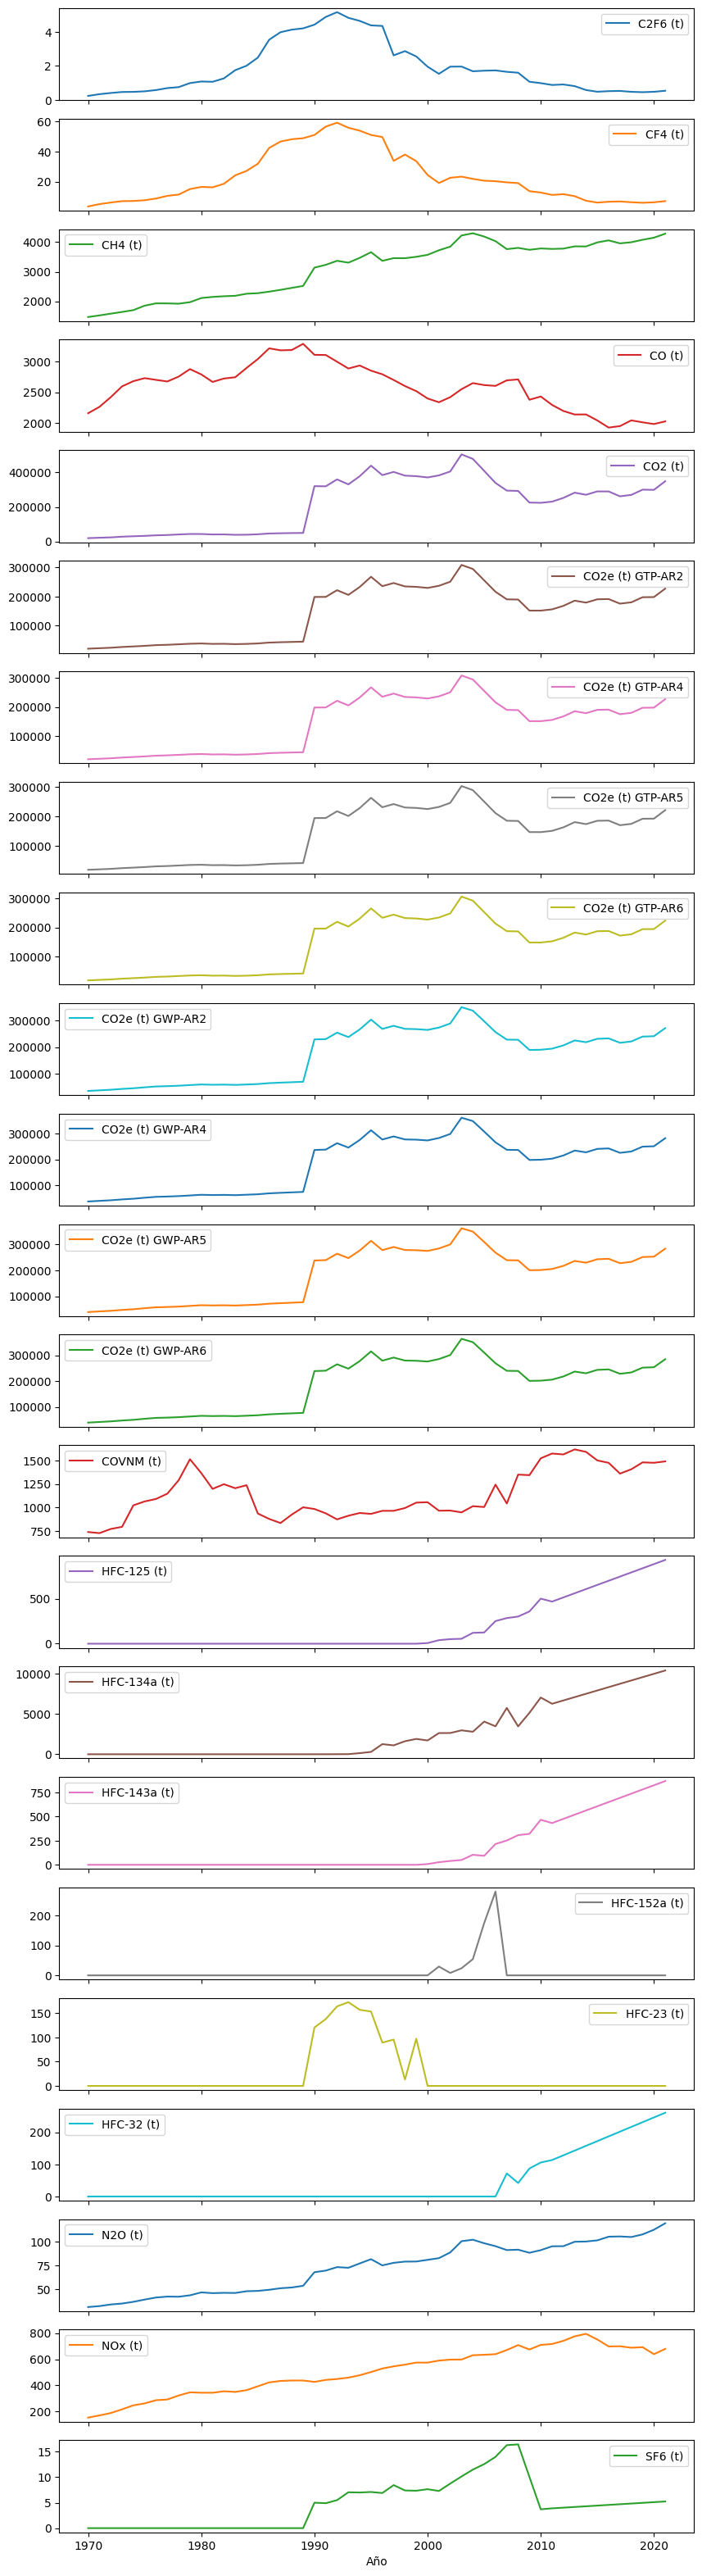

In [65]:
promedio_emision_anual.plot(subplots = True, figsize = (10,40));

### 📈 Análisis de Series de Tiempo: Evolución Histórica (Unstacking)

**Contexto de Negocio:**
Para entender el impacto temporal de nuestras políticas ambientales, necesitamos visualizar la evolución de las emisiones año tras año. Las Series de Tiempo (Time Series) son fundamentales para identificar tendencias, ciclos y anomalías (picos).

**Arquitectura del Código (Clean Code):**
* **Proyección de Rendimiento:** Nuevamente, aplicamos la regla de oro `[['Emision']]` antes del `.mean()` para que el motor matemático vuele.
* **El antipatrón `.reset_index().pivot_table()`:** Aplanar un MultiIndex para luego volver a pivotarlo es computacionalmente costoso e innecesario en Pandas.
* **La Solución Óptima (`.unstack()`):** Este método toma directamente un nivel de un índice jerárquico (ej. el Nivel 1: Gas) y lo pivota transformándolo en columnas de forma instantánea y nativa.

📊 1. Calculando tendencia global...
⚠️ INSIGHT: El pico histórico de emisiones promedio se registró en 2003 con 263,347.01 toneladas.

🔄 2. Pivotando estructura temporal por Gas (Unstack)...


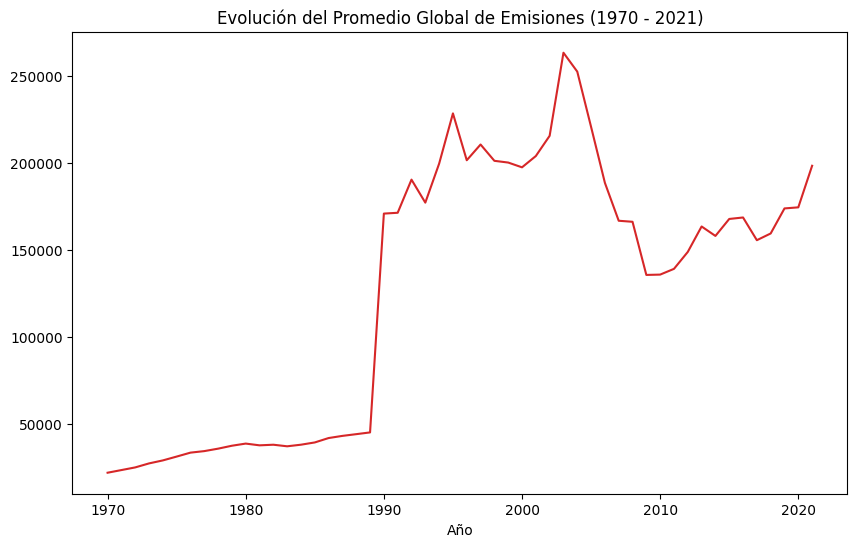

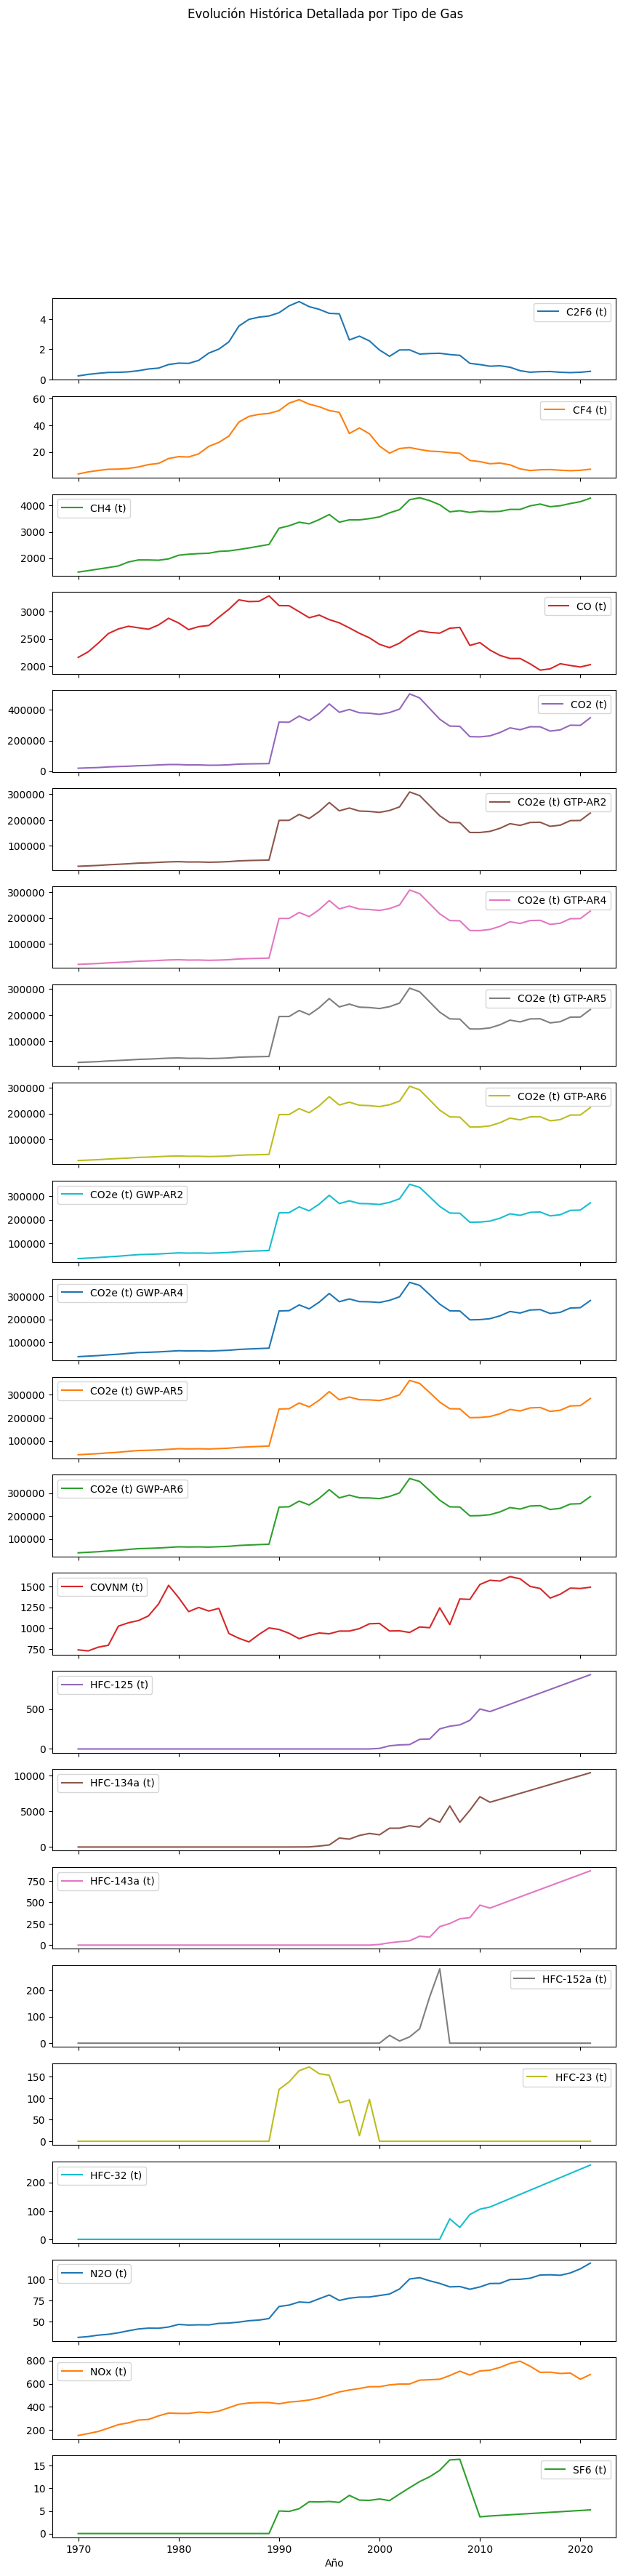

In [66]:
# ==============================================================================
# 1. VISIÓN MACRO: Evolución Promedio Global (Todos los gases)
# ==============================================================================
print("📊 1. Calculando tendencia global...")

# Agrupación simple por año con proyección de columna
tendencia_global = emisiones_por_año.groupby('Año')[['Emision']].mean()

# Encontramos el año crítico
año_pico = tendencia_global['Emision'].idxmax()
valor_pico = tendencia_global['Emision'].max()

print(f"⚠️ INSIGHT: El pico histórico de emisiones promedio se registró en {año_pico} "
      f"con {valor_pico:,.2f} toneladas.")

# Gráfico Macro
tendencia_global.plot(
    figsize=(10, 6),
    title='Evolución del Promedio Global de Emisiones (1970 - 2021)',
    legend=False,
    color='#d62728' # Rojo alerta para temas de emisiones
);

# ==============================================================================
# 2. VISIÓN MICRO: Evolución por Tipo de Gas (MultiIndex + Unstack)
# ==============================================================================
print("\n🔄 2. Pivotando estructura temporal por Gas (Unstack)...")

# Agrupamos por Año y Gas, calculamos promedio, y pivotamos el Gas a columnas al instante
evolucion_por_gas = (
    emisiones_por_año.groupby(['Año', 'Gás'])['Emision']
    .mean()
    .unstack(level=1) # <- EL SECRETO SENIOR: Transforma el Nivel 1 (Gás) en Columnas
)

# Gráfico Micro (Subplots)
# Nota: Generará múltiples gráficos apilados.
evolucion_por_gas.plot(
    subplots=True,
    figsize=(10, 40),
    title="Evolución Histórica Detallada por Tipo de Gas"
);

#4. Uniendo los datos

### Población de los estados

Importaremos una nueva base de datos con información de la población de cada estado de Brasil, para luego encontrar la emisión per cápita de cada estado.

ℹ
Los datos se obtuvieron a través de [censo del IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [68]:
poblacion_estados = pd.read_excel('/content/drive/MyDrive/Pandas/POP2022_Municipios.xls', header = 1, skipfooter = 34)
poblacion_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


Como la información se refiere a municipios, realizaremos una agregación basada en la columna estado.

In [ ]:
# Solo encontro como numericas las columnas UF y COD. , algo sucedio con la que
# necesitabamos que es poblacion
poblacion_estados.groupby('UF').sum(numeric_only = True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Notamos que la información de la población no estaba agregada, por lo que será necesario realizar algún tratamiento en esta columna para devolver los datos correctamente.

In [69]:
#Intentamos convertirlo a entero --> pero esto falla
#poblacion_estados['POPULAÇÃO'].astype(int)

In [72]:
filtro = poblacion_estados['POPULAÇÃO'].str.contains('\(', na = False)
display(poblacion_estados[filtro])

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-4175299371.py:1: SyntaxWarning: invalid escape sequence '\('
  filtro = poblacion_estados['POPULAÇÃO'].str.contains('\(', na = False)


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


### 🔗 Fase 3: Ingesta de Datos Externos y Diagnóstico de Calidad (Data Wrangling)

**Contexto del Negocio:**
Para calcular la "Eficiencia Ambiental" (Emisiones Per Cápita), necesitamos cruzar nuestra base de emisiones con los datos demográficos del Censo (IBGE). Esto nos permitirá comparar estados de forma justa, mitigando el sesgo por tamaño territorial.

**Desafíos de Ingesta (El Formato Gubernamental):**
Los reportes públicos en Excel suelen incluir metadatos visuales que rompen la estructura tabular plana requerida por Pandas.
1. **Desplazamiento de Cabeceras:** Usamos `header=1` para ignorar los títulos estéticos.
2. **Basura en el Footer:** Usamos `skipfooter=34` para ignorar las notas al pie de página.
3. **Contaminación de Tipos de Datos (Type Casting Error):** Al intentar agregar la población, descubrimos que la columna no es numérica. Contiene anotaciones en texto (ej. `12345 (1)`).

**Técnica de Auditoría (Expresiones Regulares - Regex):**
Para aislar y diagnosticar la "basura" dentro de la columna, utilizamos un filtro de texto mediante el motor lógico de *Regular Expressions* (`str.contains(r'\(')`). La barra invertida `\` le indica al motor que busque literalmente el símbolo del paréntesis, escapando de su función matemática.

In [70]:
# ==============================================================================
# 1. INGESTA Y SANEAMIENTO ESTRUCTURAL (Censo IBGE)
# ==============================================================================
print("⏳ Cargando datos demográficos...")
ruta_censo = '/content/drive/MyDrive/Pandas/POP2022_Municipios.xls'

# Cargamos el archivo omitiendo las filas de "adorno" (Títulos y notas al pie)
df_poblacion = pd.read_excel(ruta_censo, header=1, skipfooter=34)

# Clean Code: Blindaje de nombres de columnas
df_poblacion.columns = df_poblacion.columns.str.strip().str.upper()

print(f"✅ Datos cargados: {df_poblacion.shape[0]} municipios brasileños.")

# ==============================================================================
# 2. DIAGNÓSTICO DE FALLO EN AGREGACIÓN (Tipo de Dato Corrupto)
# ==============================================================================
print("\n⚠️ ALERTA DE CALIDAD DE DATOS:")
# Demostración del problema: La columna POPULAÇÃO es de tipo 'object' (texto)
print(f"El tipo de dato de la población es: {df_poblacion['POPULAÇÃO'].dtype}")

# ==============================================================================
# 3. AUDITORÍA MEDIANTE EXPRESIONES REGULARES (Regex)
# ==============================================================================

# Forzamos la columna a texto (astype) para evitar errores, y buscamos el símbolo '('
# Usamos r'\(' (Raw string) para buscar el carácter literal del paréntesis.
filtro_datos_sucios = df_poblacion['POPULAÇÃO'].astype(str).str.contains(r'\(', na=False)

# Aplicamos la máscara booleana para aislar a los "culpables"
municipios_corruptos = df_poblacion[filtro_datos_sucios]

print(f"🚨 Se encontraron {len(municipios_corruptos)} registros con anotaciones de texto anidadas.")
display(municipios_corruptos.head())

⏳ Cargando datos demográficos...
✅ Datos cargados: 5570 municipios brasileños.

⚠️ ALERTA DE CALIDAD DE DATOS:
El tipo de dato de la población es: object
🚨 Se encontraron 30 registros con anotaciones de texto anidadas.


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)


In [73]:
poblacion_estados = poblacion_estados.assign(poblacion_sin_parentesis = poblacion_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             poblacion = lambda x: x.loc[:,'poblacion_sin_parentesis'].replace('\.', '', regex = True))

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1184766578.py:1: SyntaxWarning: invalid escape sequence '\('
  poblacion_estados = poblacion_estados.assign(poblacion_sin_parentesis = poblacion_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
/tmp/ipython-input-1184766578.py:2: SyntaxWarning: invalid escape sequence '\.'
  poblacion = lambda x: x.loc[:,'poblacion_sin_parentesis'].replace('\.', '', regex = True))


In [74]:
poblacion_estados[poblacion_estados['POPULAÇÃO'].str.contains('\(', na = False)]

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-4129422138.py:1: SyntaxWarning: invalid escape sequence '\('
  poblacion_estados[poblacion_estados['POPULAÇÃO'].str.contains('\(', na = False)]


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,poblacion_sin_parentesis,poblacion
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [75]:
poblacion_estados.loc[:,'poblacion'] = poblacion_estados['poblacion'].astype(int)

In [77]:
# 1. Clean and convert the 'POPULAÇÃO' column to integer
poblacion_estados['POPULAÇÃO'] = (
    poblacion_estados['POPULAÇÃO']
    .astype(str)
    .str.replace(r'\(\d{1,2}\)', '', regex=True) # Remove parentheses and content
    .str.replace('.', '', regex=False)           # Remove thousands separator dots
    .astype(int)                                 # Convert to integer
)

# 2. Group by 'UF' and sum the cleaned 'POPULAÇÃO' column
poblacion_estados = poblacion_estados.groupby('UF')['POPULAÇÃO'].sum().reset_index()
poblacion_estados

,UF,POPULAÇÃO
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Uniendo los datos

Con la información procesada podemos unir los datos de emisiones con los datos de la población, utilizando el método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [78]:
emision_estados = emisiones_por_año[emisiones_por_año['Año'] == 2021].groupby('Estado').sum(numeric_only = True).reset_index()
emision_estados

,Estado,Emision
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [79]:
datos_agrupados = pd.merge(emision_estados, poblacion_estados, left_on = 'Estado', right_on = 'UF')
datos_agrupados

,Estado,Emision,UF,POPULAÇÃO
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


Comprobemos si hay algún indicio de si las emisiones aumentan con el tamaño de la población.

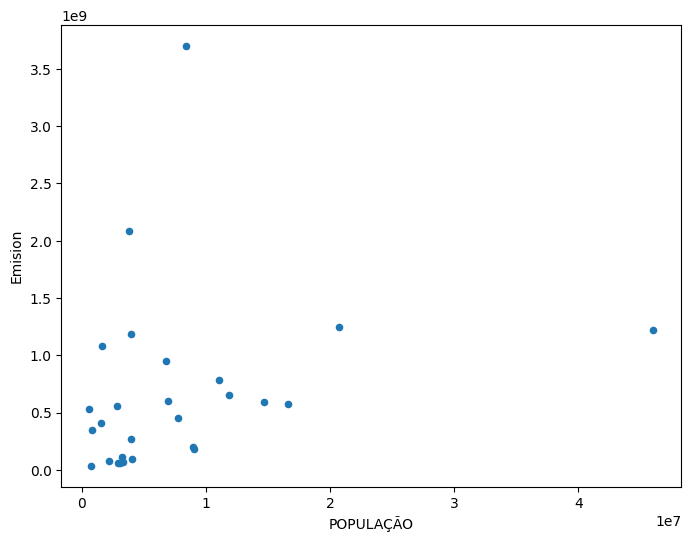

In [81]:
datos_agrupados.plot(x = 'POPULAÇÃO', y= 'Emision', kind = 'scatter', figsize=(8,6));

Si queremos conocer la información de cada estado en los puntos del gráfico, podemos utilizar otra biblioteca para obtener un gráfico más elaborado.

In [82]:
import plotly.express as px

In [84]:
px.scatter(data_frame = datos_agrupados, x = 'POPULAÇÃO', y = 'Emision', text = 'Estado', opacity = 0)

Para obtener las emisiones per cápita crearemos una nueva columna dividiendo los valores de emisión por la población de cada estado.

In [85]:
datos_agrupados = datos_agrupados.assign(emision_per_capita = datos_agrupados['Emision']/datos_agrupados['POPULAÇÃO']).sort_values('emision_per_capita', ascending = False)
datos_agrupados

,Estado,Emision,UF,POPULAÇÃO,emision_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [86]:
px.bar(data_frame = datos_agrupados, x = 'Estado', y = 'emision_per_capita')

In [87]:
px.scatter(data_frame = datos_agrupados, x = 'POPULAÇÃO', y = 'Emision', text = 'Estado', size = 'emision_per_capita')

### 🔗 Limpieza de Strings (Regex), Cruce Relacional (Merge) y Visualización Interactiva

**1. Data Cleaning (Vectorización con Regex):**
Para transformar la columna de población en valores numéricos calculables, aplicamos limpieza en cadena:
* `.str.replace(r'\(\d{1,2}\)', '')`: Busca dinámicamente cualquier paréntesis que contenga 1 o 2 dígitos adentro y lo borra.
* `.str.replace('.', '')`: Elimina los separadores de miles.
* `.astype(int)`: Convierte la cadena limpia en un número entero nativo.

**2. Cruce Relacional (`pd.merge`):**
Aplicamos la lógica de bases de datos relacionales cruzando la tabla de *Emisiones (2021)* con la tabla de *Población* utilizando las columnas que actúan como Llave Primaria (`Estado` y `UF`).

**3. Inteligencia de Negocios (KPI Per Cápita):**
Generamos la métrica de Eficiencia Ambiental dividiendo las Emisiones Totales por la Población, y utilizamos la biblioteca `plotly.express` para crear gráficos interactivos listos para presentaciones gerenciales.

In [88]:
import pandas as pd
import plotly.express as px

# ==============================================================================
# 1. DATA CLEANING: Limpieza Quirúrgica con Regex
# ==============================================================================
print("🧹 Limpiando metadatos de la tabla de población...")

# Limpiamos y convertimos la columna en un solo paso vectorizado
df_poblacion['POPULAÇÃO'] = (
    df_poblacion['POPULAÇÃO']
    .astype(str)
    .str.replace(r'\(\d{1,2}\)', '', regex=True) # Elimina los paréntesis y su número interno
    .str.replace('.', '', regex=False)           # Elimina los puntos de miles
    .astype(int)                                 # Convierte a Entero de 64 bits
)

# Agrupamos la población por Estado para tener Llaves Únicas (1 fila por estado)
poblacion_agrupada = df_poblacion.groupby('UF')[['POPULAÇÃO']].sum().reset_index()

# ==============================================================================
# 2. PREPARACIÓN DE DATOS OBJETIVO (Emisiones 2021)
# ==============================================================================
print("⏳ Preparando datos de emisiones (Año 2021)...")

# Filtramos el año, agrupamos por Estado y proyectamos la Emisión
emisiones_2021 = (
    emisiones_por_año[emisiones_por_año['Año'] == 2021]
    .groupby('Estado')[['Emision']]
    .sum()
    .reset_index()
)

# ==============================================================================
# 3. CRUCE RELACIONAL (Merge) Y CÁLCULO DE KPI
# ==============================================================================
print("🔗 Cruzando bases de datos y calculando KPI Per Cápita...")

# Hacemos el cruce (Join) entre ambas tablas
datos_completos = pd.merge(
    left=emisiones_2021,
    right=poblacion_agrupada,
    left_on='Estado',   # Llave en la tabla izquierda
    right_on='UF'       # Llave en la tabla derecha
)

# Calculamos la métrica de eficiencia
datos_completos['Emision_Per_Capita'] = datos_completos['Emision'] / datos_completos['POPULAÇÃO']

# Ordenamos para destacar a los mayores infractores
datos_completos = datos_completos.sort_values(by='Emision_Per_Capita', ascending=False)

display(datos_completos.head())

# ==============================================================================
# 4. VISUALIZACIÓN INTERACTIVA (Plotly)
# ==============================================================================
print("\n📊 Generando visualizaciones interactivas...")

# Gráfico 1: Ranking de Emisión Per Cápita (Barras)
fig_bar = px.bar(
    data_frame=datos_completos,
    x='Estado',
    y='Emision_Per_Capita',
    title='Ranking de Emisión Per Cápita por Estado (2021)',
    color='Emision_Per_Capita',
    color_continuous_scale='Reds' # Paleta de colores gerencial para alertas
)
fig_bar.show()

# Gráfico 2: Relación Población vs Emisiones (Burbujas)
fig_scatter = px.scatter(
    data_frame=datos_completos,
    x='POPULAÇÃO',
    y='Emision',
    text='Estado',
    size='Emision_Per_Capita',
    title='Matriz Población vs. Emisiones Totales (El tamaño indica la Emisión Per Cápita)',
    size_max=50 # Tamaño máximo de la burbuja para que no sature la pantalla
)
fig_scatter.update_traces(textposition='top center') # Evita que el texto tape la burbuja
fig_scatter.show()

🧹 Limpiando metadatos de la tabla de población...
⏳ Preparando datos de emisiones (Año 2021)...
🔗 Cruzando bases de datos y calculando KPI Per Cápita...


,Estado,Emision,UF,POPULAÇÃO,Emision_Per_Capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928



📊 Generando visualizaciones interactivas...


### 📚 Teoría de Arquitectura de Datos: Data Wrangling y Álgebra Relacional

#### 1. Limpieza de Texto Avanzada: Expresiones Regulares (Regex)
En bases de datos corporativas o gubernamentales, la consistencia de los textos suele ser pobre. Las **Expresiones Regulares (Regex)** son un micro-lenguaje de programación diseñado para buscar, validar y extraer patrones lógicos dentro de cadenas de texto (Strings), sin importar sus variaciones. En Pandas, métodos como `.str.contains()` y `.str.replace()` aceptan el parámetro `regex=True`.

**Diccionario de Metacaracteres Esenciales:**

| Símbolo | Función Analítica | Ejemplo Práctico |
| :--- | :--- | :--- |
| **`.`** | Coincide con cualquier carácter (excepto saltos de línea). | `A.C` encuentra "ABC", "A1C", "A-C". |
| **`*`** | 0 o más repeticiones del elemento anterior. | `ab*c` encuentra "ac", "abc", "abbbc". |
| **`?`** | 0 o 1 repetición (hace que el elemento sea opcional). | `casas?` encuentra "casa" y "casas". |
| **`{m,n}`**| Rango exacto de repeticiones (de *m* a *n* veces). | `\d{2,4}` busca números de entre 2 y 4 cifras. |
| **`[]`** | Conjunto de opciones permitidas. El `-` marca intervalos. | `[A-Z]` busca cualquier letra mayúscula. |
| **`\d`** | Coincide con cualquier dígito (Equivalente a `[0-9]`). | `\d\d` busca exactamente dos números seguidos. |
| **`\w`** | Carácter alfanumérico (letras, números o guiones bajos). | `\w+` busca una palabra completa. |
| **`\`** | Carácter de escape. Cancela la función del símbolo lógico. | `\(` busca literalmente el símbolo "(". |

---

#### 2. Modelado de Datos Relacionales: Concat, Join y Merge
Para consolidar métricas de negocio, es imperativo combinar información de distintas tablas (ej. cruzar una tabla de "Ventas" con un maestro de "Clientes"). Pandas ofrece tres motores de combinación:

* **`pd.concat()` (Apilamiento Estructural):** * **Uso:** Une tablas copiándolas una debajo de la otra (`axis=0`) o una al lado de la otra (`axis=1`).
    * **Equivalencia SQL:** Comando `UNION`.
    * **Condición:** Ideal cuando tienes el mismo formato de archivo separado por meses (Enero, Febrero, Marzo) y quieres una tabla anual.
* **`.join()` (Cruce por Índices):**
    * **Uso:** Combina dos DataFrames basándose estrictamente en sus Índices (las etiquetas de las filas). Es rápido, pero rígido.
* **`.merge()` (Cruce Relacional Completo):**
    * **Uso:** El estándar de la industria. Cruza tablas basándose en el contenido de columnas específicas compartidas (Llaves Primarias/Foráneas), usando los parámetros `left_on` y `right_on`.
    * **Equivalencia SQL:** Comandos `JOIN` tradicionales (`how='inner'`, `'left'`, `'right'`, `'outer'`).
    * **Condición:** Ideal para relacionar entidades comerciales abstractas (Ej. Unir emisiones con población usando el código de Provincia).

---

#### 🏆 Resumen del Arsenal Técnico Adquirido (Capítulo Final)
En esta fase de Consolidación y Data Wrangling, hemos incorporado las siguientes herramientas a nuestro flujo *Clean Code*:
1.  **Diagnóstico Textual:** Uso de `str.contains()` con patrones Regex para detectar anomalías o datos corruptos silenciados en bases masivas.
2.  **Vectorización de Limpieza:** Sustitución quirúrgica de metadatos (espacios, paréntesis, caracteres especiales) encadenando `.str.replace()` y formateando tipos con `.astype()`.
3.  **Álgebra Relacional (`merge`):** Unión de entidades de datos independientes mediante llaves foráneas para permitir cálculos de negocio cruzados.
4.  **Generación de KPIs:** Creación de variables de eficiencia (Ej. *Emisión Per Cápita*) para estandarizar mediciones y eliminar sesgos volumétricos.
5.  **Storytelling Interactivo (`plotly.express`):** Despliegue de resultados matemáticos a través de gráficos jerárquicos y de dispersión enriquecidos con *tooltips* interactivos para presentaciones ejecutivas.